In [1]:
from load_data import load_data
import pickle
import cv2

#keras
from keras.models import Sequential
from keras.layers import UpSampling2D
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import sklearn.metrics as metrics

# constants
HEIGHT = 28
WIDTH = 28

x_train, y_train, x_test, y_test, x_val, y_val, num_classes = load_data()

In [18]:
def build_model():
    """
    build a model of convolutional neural network
    adapt from https://www.kaggle.com/ashwani07/emnist-using-keras-cnn
    important doc: https://keras.io/guides/sequential_model/
    """
#     idealest
#     model = Sequential()

#     model.add(Conv2D(filters=512, kernel_size=(11,11), padding = 'same', activation='relu',\
#                      input_shape=(HEIGHT, WIDTH,1)))
#     model.add(Conv2D(filters=1024, kernel_size=(13,13) , padding = 'same', activation='relu'))
#     model.add(Conv2D(filters=1024, kernel_size=(13,13) , padding = 'same', activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(Conv2D(filters=512, kernel_size=(11,11) , padding = 'same', activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(Conv2D(filters=256, kernel_size=(9,9) , padding = 'same', activation='relu'))
#     model.add(Conv2D(filters=256, kernel_size=(9,9) , padding = 'same', activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#     model.add(Flatten())
#     model.add(Dense(units=128, activation='relu'))
#     model.add(Dropout(.5))
#     model.add(Dense(units=num_classes, activation='softmax'))

#     return model

#     sub ideal
#     model = Sequential()

#     model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
#                      input_shape=(HEIGHT, WIDTH,1)))
#     model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#     model.add(Conv2D(filters=256, kernel_size=(5,5), padding = 'same', activation='relu',\
#                      input_shape=(HEIGHT, WIDTH,1)))
#     model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#     model.add(Conv2D(filters=256, kernel_size=(5,5), padding = 'same', activation='relu',\
#                      input_shape=(HEIGHT, WIDTH,1)))
#     model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#     model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
#                      input_shape=(HEIGHT, WIDTH,1)))
#     model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#     model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
#     model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))

#     model.add(Flatten())
#     model.add(Dense(units=128, activation='relu'))
#     model.add(Dropout(.5))
#     model.add(Dense(units=num_classes, activation='softmax'))

    model = Sequential()

    model.add(Conv2D(filters=64, kernel_size=(5,5), padding = 'same', activation='relu',\
                     input_shape=(HEIGHT, WIDTH,1)))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                     input_shape=(HEIGHT, WIDTH,1)))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                     input_shape=(HEIGHT, WIDTH,1)))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Conv2D(filters=64, kernel_size=(5,5), padding = 'same', activation='relu',\
                     input_shape=(HEIGHT, WIDTH,1)))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Conv2D(filters=32, kernel_size=(3,3) , padding = 'same', activation='relu'))
    model.add(Conv2D(filters=32, kernel_size=(3,3) , padding = 'same', activation='relu'))

    model.add(Flatten())
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(units=num_classes, activation='softmax'))

    return model

In [3]:
def train_model(model):
    """
    train a convolutional neural network model
    adapt from https://www.kaggle.com/ashwani07/emnist-using-keras-cnn
    important doc: https://keras.io/guides/training_with_built_in_methods/
    
    epoch: number of times to feed the train data chunks into the model
    batch_size: the size of one chunk
    categorical_crossentropy: a loss function to minimize losts
    metrics: list of metrics to monitor (in this example we monitor accuracy only)
    """
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    cnn = model.fit(x_train, y_train, epochs=15, batch_size=512, verbose=1, \
                    validation_data=(x_val, y_val))
    return cnn

In [4]:
def show_training_process(cnn):
    """
    show the loss and accuracy improvement for each
    epoch, adapt from https://www.kaggle.com/ashwani07/emnist-using-keras-cnn
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    epochs = np.arange(1, 16).tolist()
    print(cnn.history.keys())
    
    acc = cnn.history['accuracy']
    val_acc = cnn.history['val_accuracy']
    loss = cnn.history['loss']
    val_loss = cnn.history['val_loss']
    
    plt.figure()
    plt.plot(epochs, acc, "b", label="train accuracy")
    plt.plot(epochs, val_acc, "r", label="val accuracy")
    plt.xlabel("epoch #")
    plt.ylabel("accuracy")
    plt.title("accuracy for each epoch")
    plt.legend()
    plt.savefig("accuracy.png")
    
    plt.figure()
    plt.plot(epochs, loss, "b", label="train loss")
    plt.plot(epochs, val_loss, "r", label="val loss")
    plt.xlabel("epoch #")
    plt.ylabel("loss")
    plt.title("loss for each epoch")
    plt.legend()
    plt.savefig("loss.png")

In [ ]:
def calculate_accuracy(cnn):
    """
    test accuracy on the test dataset
    reference from https://keras.io/api/metrics/accuracy_metrics/#accuracy-class
    """
    score = cnn.evaluate(x_test, y_test)
    accuracy = score[1]
    
    return accuracy

In [26]:
def save_model(cnn, name):
    """
    Save to file in the current working directory
    learn from https://machinelearningmastery.com/save-load-keras-deep-learning-models/
    """
    model_json = model.to_json()
    with open("{}.json".format(name), "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights("{}.h5".format(name))
    print("done")

In [19]:
if __name__ == "__main__":
    model = build_model()
    # enable monitoring how a stack of Conv2D and MaxPooling2D layers is downsampling image feature maps
    model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 64)        1664      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 128)       204928    
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 7, 7, 128)         409728    
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 3, 3, 64)         

In [20]:
    cnn = train_model(model)

Epoch 1/15
1227/1227 [==============================] - 1563s 1s/step - loss: 0.7900 - accuracy: 0.7639 - val_loss: 0.4273 - val_accuracy: 0.8469
Epoch 2/15
1227/1227 [==============================] - 1537s 1s/step - loss: 0.4402 - accuracy: 0.8486 - val_loss: 0.3932 - val_accuracy: 0.8584
Epoch 3/15
1227/1227 [==============================] - 1531s 1s/step - loss: 0.4097 - accuracy: 0.8575 - val_loss: 0.3834 - val_accuracy: 0.8612
Epoch 4/15
1227/1227 [==============================] - 1515s 1s/step - loss: 0.3919 - accuracy: 0.8614 - val_loss: 0.3792 - val_accuracy: 0.8634
Epoch 5/15
1227/1227 [==============================] - 1528s 1s/step - loss: 0.3784 - accuracy: 0.8651 - val_loss: 0.3749 - val_accuracy: 0.8647
Epoch 6/15
1227/1227 [==============================] - 1522s 1s/step - loss: 0.3688 - accuracy: 0.8673 - val_loss: 0.3694 - val_accuracy: 0.8668
Epoch 7/15
1227/1227 [==============================] - 1556s 1s/step - loss: 0.3596 - accuracy: 0.8701 - val_loss: 0.3796 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


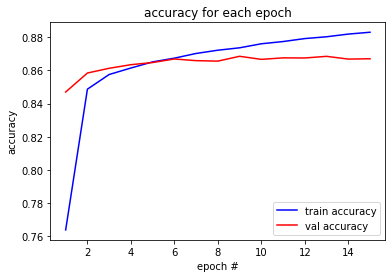

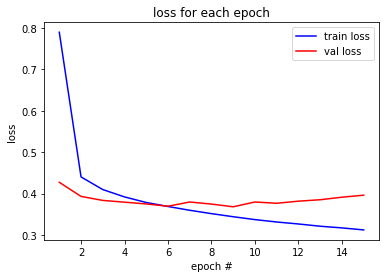

In [22]:
    show_training_process(cnn)

In [23]:
    accuracy = calculate_accuracy(model)

3636/3636 [==============================] - 60s 16ms/step - loss: 0.3913 - accuracy: 0.8681


In [24]:
    print(accuracy)

0.8681333065032959


In [27]:
    save_model(model, "model2")

done
